In [67]:
import numpy as np
import pandas as pd

crits = {
    "Цена": {"weight": 4, "direction": "min"},
    "Расход топлива": {"weight": 3, "direction": "min"},
    "Надежность": {"weight": 5, "direction": "max"},
    "Комфорт": {"weight": 5, "direction": "max"},
    "Полный привод": {"weight": 2, "direction": "max"}
}

alternatives = {
    "Skoda Kodiaq": [10, 10, 15, 15, 10],
    "Vw tiguan": [10, 10, 15, 10, 5],
    "Hyundai creta": [5, 5, 5, 5, 5],
    "Tank 300": [5, 15, 5, 10, 10],
    "Kia carnival": [15, 10, 10, 15, 5],
    "Toyota rav4": [15, 10, 10, 10, 10],
    "Kia seltos": [5, 5, 10, 10, 5],
    "Bmw x3": [15, 15, 15, 15, 5],
    "Omoda c5": [10, 10, 5, 5, 5],
    "Mitsubishi outlander": [10, 10, 15, 10, 10]
}

preference_matrix = pd.DataFrame(np.zeros((len(alternatives), len(alternatives))),
                                 index=alternatives.keys(), columns=alternatives.keys())

def calculate_P_N_D(alt1, alt2, crits):
    P, N = 0, 0
    for i, crit in enumerate(criteria):
        weight = crits[crit]["weight"]
        direction = crits[crit]["direction"]
        a1, a2 = alt1[i], alt2[i]
        if a1 != a2:
            if (direction == "max" and a1 > a2) or (direction == "min" and a1 < a2):
                P += weight
            else:
                N += weight
    D = P / N if N != 0 else np.inf
    return P, N, D

for i, alt1 in enumerate(alternatives.keys(), start=1):
    for j, alt2 in enumerate(alternatives.keys(), start=1):
        if alt1 != alt2:
            P, N, D = calculate_P_N_D(np.array(alternatives[alt1]), np.array(alternatives[alt2]), criteria)
            value_to_input = None
            if D>=1 and D != np.inf:
                value_to_input = P
            elif D == np.inf:
                value_to_input = np.inf
            else:
                value_to_input = -1
            preference_matrix.at[alt1, alt2] = value_to_input

preference_matrix


,Skoda Kodiaq,Vw tiguan,Hyundai creta,Tank 300,Kia carnival,Toyota rav4,Kia seltos,Bmw x3,Omoda c5,Mitsubishi outlander
Skoda Kodiaq,0.0,inf,12.0,13.0,inf,inf,12.0,inf,inf,inf
Vw tiguan,-1.0,0.0,10.0,8.0,9.0,9.0,-1.0,7.0,inf,-1.0
Hyundai creta,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,inf,-1.0
Tank 300,-1.0,-1.0,7.0,0.0,-1.0,-1.0,-1.0,-1.0,11.0,-1.0
Kia carnival,-1.0,-1.0,10.0,13.0,0.0,5.0,-1.0,-1.0,10.0,-1.0
Toyota rav4,-1.0,-1.0,12.0,8.0,-1.0,0.0,-1.0,-1.0,12.0,-1.0
Kia seltos,-1.0,7.0,inf,8.0,7.0,7.0,0.0,-1.0,inf,7.0
Bmw x3,-1.0,-1.0,10.0,10.0,5.0,10.0,10.0,0.0,10.0,-1.0
Omoda c5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0
Mitsubishi outlander,-1.0,inf,12.0,8.0,11.0,inf,7.0,9.0,inf,0.0


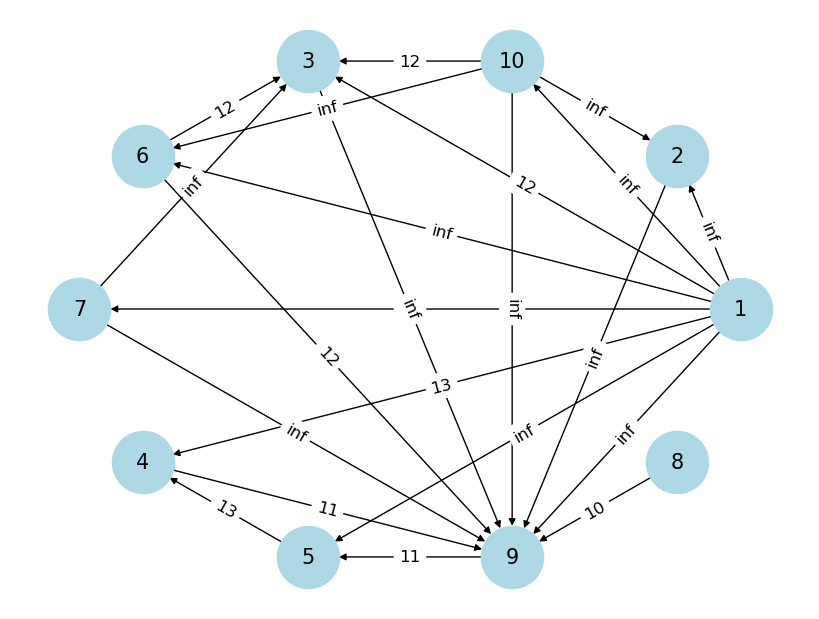

In [68]:
from matplotlib import pyplot as plt
import networkx as nx

big_number = np.inf
preference_matrix_corrected = [
    [None, None, None, None, None, None, None, None, None, None],
    [big_number, None, None, None, None, None, None, 7, None, big_number],
    [12, 10, None, 7, 10, 12, big_number, 10, None, 12],
    [13, 8, None, None, 13, 8, 8, 10, None, 8],
    [big_number, 9, None, None, None, 7, 5, None, 11, None],
    [big_number, 9, None, None, 5, None, 7, 10, None, big_number],
    [12, None, None, None, None, None, None, 10, None, 7],
    [7, None, None, None, None, None, None, None, 9, None],
    [big_number, big_number, big_number, 11, 10, 12, big_number, 10, None, big_number],
    [big_number, None, None, None, None, 7, None, None, None, None]
]


preference_matrix_corrected2 = [
    [None, None, None, None, None, None, None, None, None, None],
    [big_number, None, None, None, None, None, None,None, None, big_number],
    [12, None, None, None, None, 12, big_number, None, None, 12],
    [13, None, None, None, 13, None, None, None, None, None],
    [big_number, None, None, None, None, None, None, None, 11, None],
    [big_number, None, None, None, None, None, None, None, None, big_number],
    [12, None, None, None, None, None, None, None, None, None],
    [None, None, None, None, None, None, None, None, None, None],
    [big_number, big_number, big_number, 11, None, 12, big_number, 10, None, big_number],
    [big_number, None, None, None, None, None, None, None, None, None]
]


G_inverted = nx.DiGraph()

for i, row in enumerate(preference_matrix_corrected2):
    for j, val in enumerate(row):
        if val is not None:
            G_inverted.add_edge(j + 1, i + 1, weight='inf' if val == big_number else val)

pos_inverted = nx.circular_layout(G_inverted)
plt.figure(figsize=(8, 6))
nx.draw(G_inverted, pos_inverted, with_labels=True, node_color='lightblue', node_size=2000, font_size=15)

edge_labels_inverted = {(u, v): d['weight'] for u, v, d in G_inverted.edges(data=True)}
nx.draw_networkx_edge_labels(G_inverted, pos_inverted, edge_labels=edge_labels_inverted, font_size=12)

plt.show()

In [69]:
preference_matrix = preference_matrix.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x <= 10 else x)
preference_matrix

/tmp/ipykernel_173391/487671547.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preference_matrix = preference_matrix.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x <= 10 else x)


,Skoda Kodiaq,Vw tiguan,Hyundai creta,Tank 300,Kia carnival,Toyota rav4,Kia seltos,Bmw x3,Omoda c5,Mitsubishi outlander
Skoda Kodiaq,NaN,inf,12.0,13.0,inf,inf,12.0,inf,inf,inf
Vw tiguan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,NaN
Hyundai creta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,NaN
Tank 300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN
Kia carnival,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
Toyota rav4,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN
Kia seltos,NaN,NaN,inf,NaN,NaN,NaN,NaN,NaN,inf,NaN
Bmw x3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Omoda c5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mitsubishi outlander,NaN,inf,12.0,NaN,11.0,inf,NaN,NaN,inf,NaN
